# Lenin Kamma
# DSC680-Texas Insurance Complaints Project

# Import Libraries

In [270]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load Data

In [3]:
# Function to create datafraame from CSV files
# Load csv files
consumerdf2018Q1 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2018Q1.csv", keep_default_na=False)
consumerdf2018Q2 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2018Q2.csv", keep_default_na=False)
consumerdf2018Q3 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2018Q3.csv", keep_default_na=False)
consumerdf2018Q4 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2018Q4.csv", keep_default_na=False)
consumerdf2019Q1 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2019Q1.csv", keep_default_na=False)
consumerdf2019Q2 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2019Q2.csv", keep_default_na=False)
consumerdf2019Q3 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2019Q3.csv", keep_default_na=False)
consumerdf2019Q4 = pd.read_csv("C:/Lenin Data Science/Final Class/Final Class/CI2019Q4.csv", keep_default_na=False)   


In [273]:
# Concatenate all dataframes into one dataframe
consdf = pd.concat([consumerdf2018Q1,consumerdf2018Q2,consumerdf2018Q3,consumerdf2018Q4,consumerdf2019Q1,consumerdf2019Q2,consumerdf2019Q3,consumerdf2019Q4],axis=0)


## Data Cleanup and Transformation

In [277]:
# replace spaces in headers with underscore
consdf.columns = [x.replace(' ', '_') for x in consdf.columns]

In [278]:
# Verify column names
consdf.columns

Index(['As_of_Date', 'Complaint_Number', 'Owner', 'Received_Date',
       'Closed_Date', 'Correspondent', 'Correspondent_Location',
       'Subject_of_Complaint', 'Subject_Name', 'Subject_ID',
       'Line_of_Coverage', 'Reason_for_Complaint', 'Disposition_of_Complaint'],
      dtype='object')

In [279]:
# Copy complain number and received date into a different dataframe
consdfcomp = consdf[["Complaint_Number","Received_Date"]]

In [280]:
#Create Received_Month and Received_Yr from Received_Date field

consdfcomp['Received_Date'] = pd.to_datetime(consdfcomp['Received_Date'])
consdfcomp['Received_Year'], consdfcomp['Received_Month'] = consdfcomp['Received_Date'].apply(lambda x: x.year), consdfcomp['Received_Date'].apply(lambda x: x.month)

C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [281]:
# Drop duplicate complaints from the dataframe
consdfcomp.drop_duplicates(inplace=True)


C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [282]:
# Create a dataframe with number of complaints group by year and month
consdfcount = consdfcomp.groupby(["Received_Year","Received_Month"], as_index=False)["Received_Date"].count()
consdfcount

,Received_Year,Received_Month,Received_Date
0,2018,1,342
1,2018,2,356
2,2018,3,334
3,2018,4,303
4,2018,5,362
5,2018,6,304
6,2018,7,357
7,2018,8,339
8,2018,9,326
9,2018,10,329


In [283]:
#Rename Date to Count
consdfcount.rename(columns = {"Received_Date": "Received_Count"}, inplace=True)

In [284]:
# Create separate variables for each year
x=consdfcount[consdfcount["Received_Year"] == 2018][["Received_Month","Received_Count"]]
y=consdfcount[consdfcount["Received_Year"] == 2019][["Received_Month","Received_Count"]]

In [285]:
# Total Number of Complaints in 2018
x.sum()

Received_Month      78
Received_Count    3881
dtype: int64

In [287]:
# Total Number of Complaints in 2019
y.sum()

Received_Month      78
Received_Count    1831
dtype: int64

## Create Plots

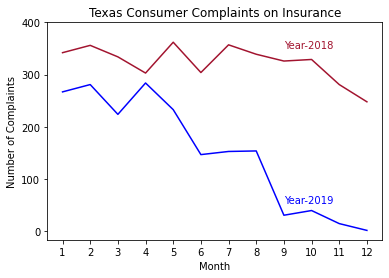

In [288]:
# Create a scatter plot with month on x-axis and number of complaints on y-axis
plt.plot(x["Received_Month"], x["Received_Count"], color='#A2142F')
plt.plot(y["Received_Month"], y["Received_Count"], color='BLUE')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0,500,100))
plt.ylabel('Number of Complaints')
plt.title("Texas Consumer Complaints on Insurance")
plt.text(9,350,'Year-2018',color='#A2142F')
plt.text(9,55,'Year-2019',color='BLUE')
plt.savefig('C:/Lenin Data Science/Final Class/Final Class/Line1.pdf', dpi=800)
plt.show()

In [289]:
# Retrieve Complaint Number and Subject Name
# Drop duplicates
# Group by subject name to get the count of complaints filed
# Reset index to add counts
consdfname = consdf[["Complaint_Number","Subject_Name"]].drop_duplicates().groupby("Subject_Name")["Complaint_Number"].agg('count').to_frame('Count').reset_index()

In [290]:
# Top 25 Insurance companies with highest consumer complaints
consdftop25 = consdfname.nlargest(25, columns=["Count"])

In [291]:
# Replace blanks with "Name Unknown"
consdftop25["Subject_Name"].replace("","Name Unknown",inplace=True)

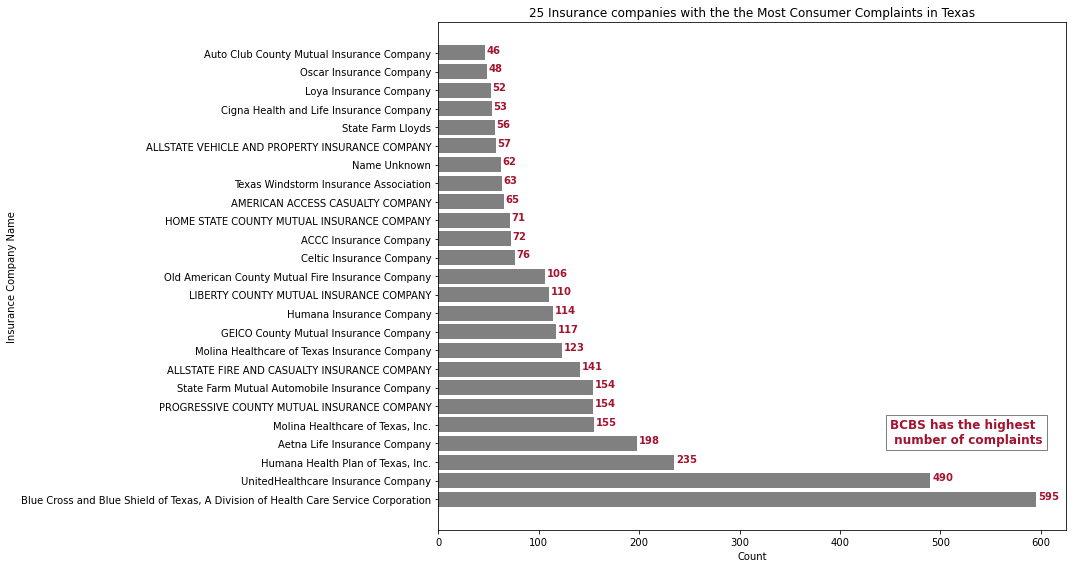

In [292]:
# Create a bar chart of 
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(data=consdftop25, y='Subject_Name',width='Count',color='gray')
plt.ylabel('Insurance Company Name')
plt.xlabel('Count')
plt.title('25 Insurance companies with the the Most Consumer Complaints in Texas')
textstr = "BCBS has the highest \n number of complaints"
ax.text(450, 3.0, textstr, fontsize=12,color='#A2142F',fontWeight='bold',bbox=dict(facecolor='white', alpha=1.5))
for i, v in enumerate(consdftop25['Count']):
    ax.text(v+2,i,v, color='#A2142F', fontWeight='bold')
plt.tight_layout()
plt.savefig('C:/Lenin Data Science/Final Class/Final Class/Hist1.pdf', dpi=1200)
plt.show()

In [293]:
# Retrieve Complaint Number and Line of Coverage
# Drop duplicates
# Group by Line of Coverage to get the count of complaints filed
# Reset index to add counts
consdfline = consdf[["Complaint_Number","Line_of_Coverage"]].drop_duplicates().groupby("Line_of_Coverage")["Complaint_Number"].agg('count').to_frame('Count').reset_index()

In [294]:
# Consumer complaints by line of Coverage
consdflinetop = consdfline.nlargest(25, columns=["Count"])

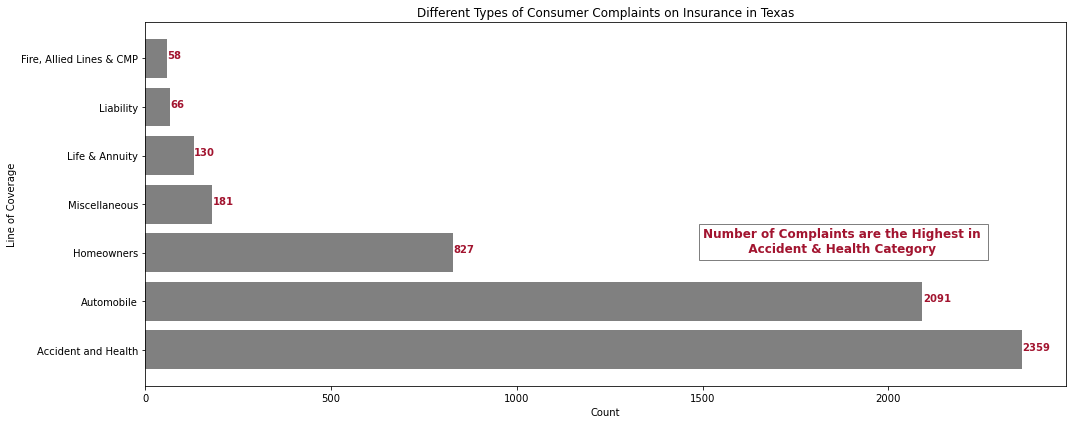

In [295]:
# Create a bar chart on the line of coverage
fig, ax = plt.subplots(figsize=(15,6))
ax.barh(data=consdflinetop, y='Line_of_Coverage',width='Count',color='gray')
plt.ylabel('Line of Coverage')
plt.xlabel('Count')
plt.title('Different Types of Consumer Complaints on Insurance in Texas')
textstr = "Number of Complaints are the Highest in \n           Accident & Health Category"
ax.text(1500, 2, textstr, fontsize=12,color='#A2142F',fontWeight='bold',bbox=dict(facecolor='white', alpha=1.5))
for i, v in enumerate(consdflinetop['Count']):
    ax.text(v+2,i,v, color='#A2142F', fontWeight='bold')
plt.tight_layout()
plt.savefig('C:/Lenin Data Science/Final Class/Final Class/Hist2.pdf', dpi=1200)
plt.show()

In [296]:
# Retrieve Complaint Number and Line of Coverage
# Drop duplicates
# Group by Reason for Complaint to get the count of complaints filed
# Reset index to add counts
consdfrsn = consdf[["Complaint_Number","Reason_for_Complaint"]].drop_duplicates().groupby("Reason_for_Complaint")["Complaint_Number"].agg('count').to_frame('Count').reset_index()

In [297]:
# Consumer complaints by line of Coverage
consdfrsntop = consdfrsn.nlargest(25, columns=["Count"])

In [298]:
consdfrsntop['Percent'] = (consdfrsntop['Count']/ consdfrsntop['Count'].sum()) * 100

In [299]:
consdfrsntop

,Reason_for_Complaint,Count,Percent
101,Unsatisfactory Settle/Offer,2241,22.549809
23,Delays (Claims Handling),2066,20.788891
20,Customer Service,1181,11.883679
30,Denial Of Claim,948,9.539143
104,Usual And Customary,588,5.916683
82,Prompt Pay Penalty Not Paid,506,5.091568
5,Balance Billing,348,3.501711
24,Delays (Policyholder Service),329,3.310525
2,Agent Handling,277,2.787281
88,Refund Of Premium,231,2.324411


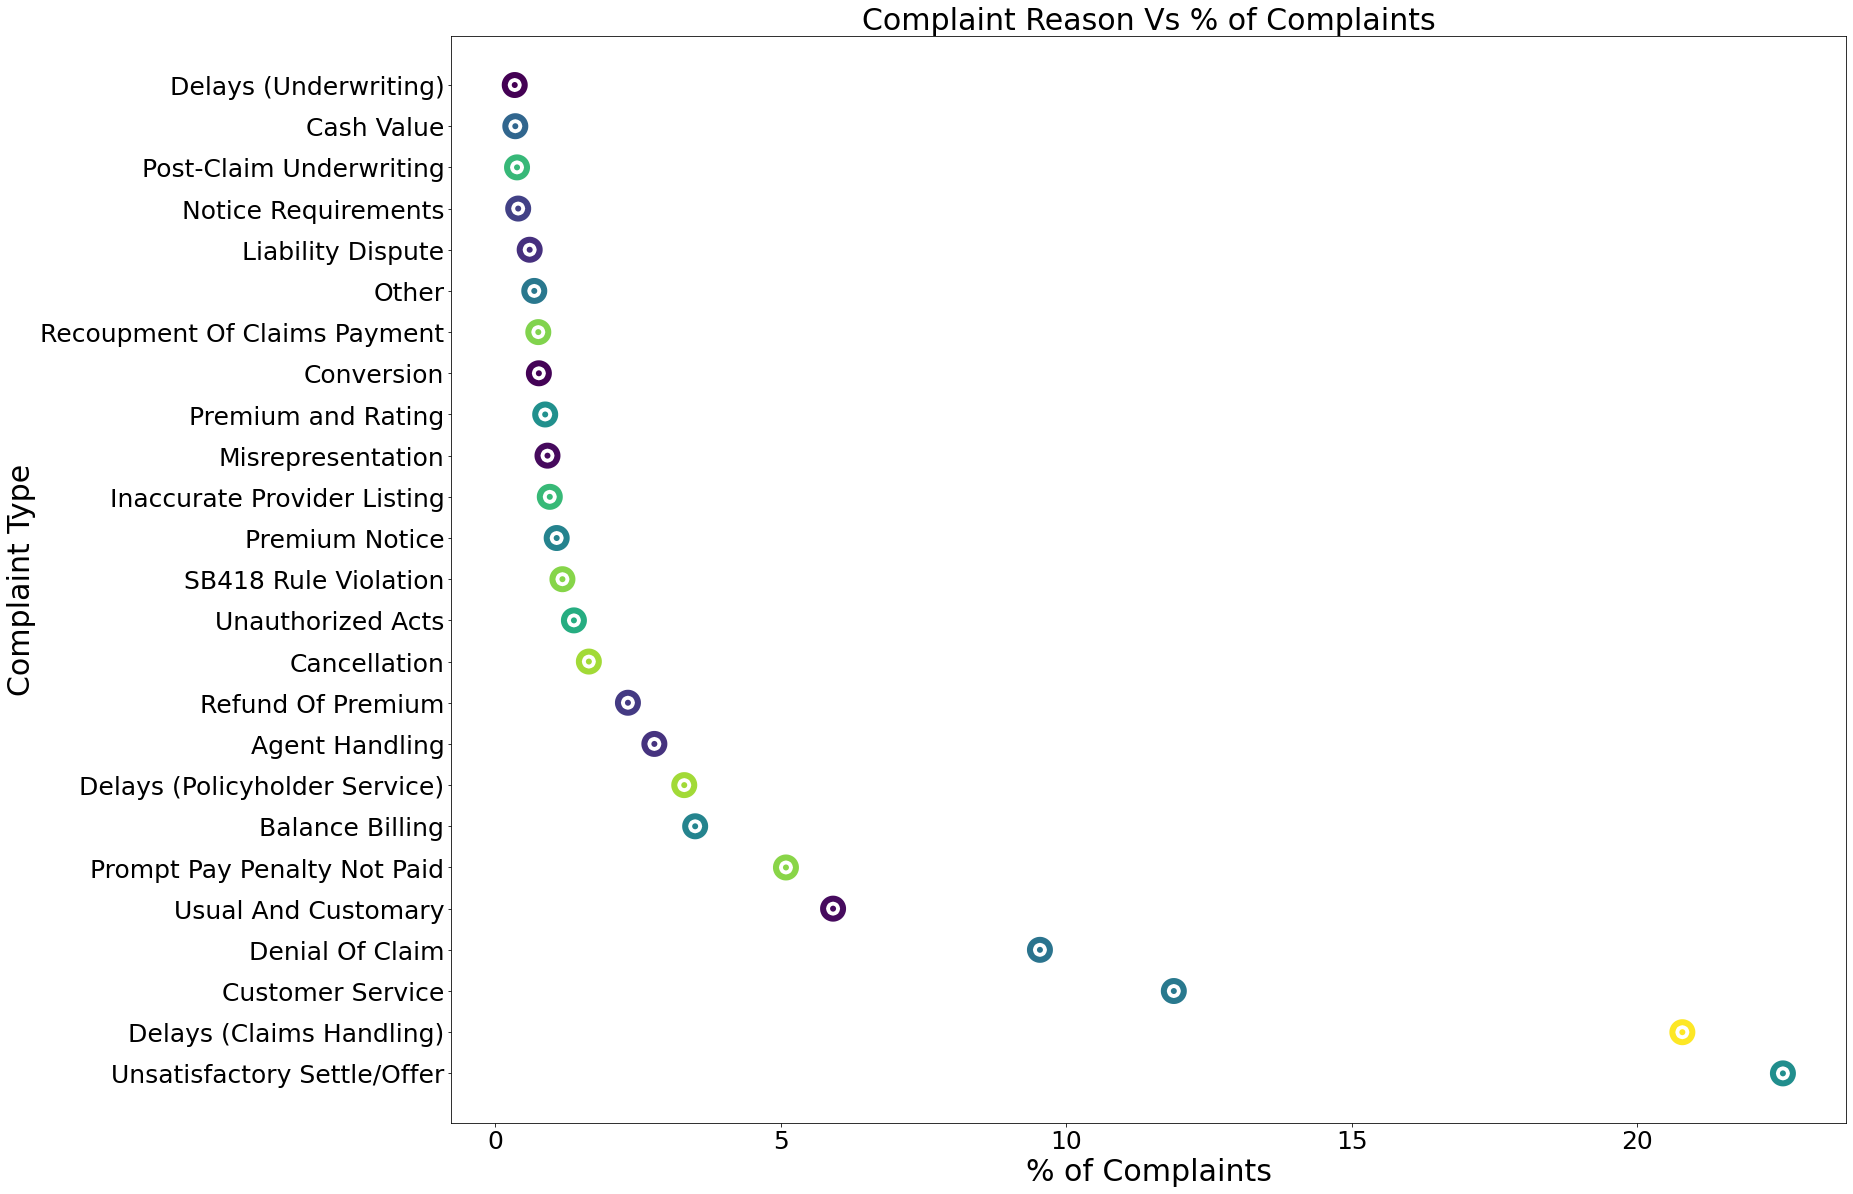

In [27]:
# Create a Scatter plot - Reason for Complaint vs. Count
fig = plt.figure(figsize=(25,20))

# Create random colors
colors1=np.random.rand(consdfrsntop["Reason_for_Complaint"].shape[0])


# Scatter plot and labels
plt.scatter(consdfrsntop["Percent"], consdfrsntop["Reason_for_Complaint"], c=colors1, linewidths=20)

plt.title('Complaint Reason Vs % of Complaints', fontsize=30)
plt.xlabel('% of Complaints', fontsize=30)
plt.ylabel('Complaint Type', fontsize=30)


# Rotate xticks to show vertical
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Save figure
plt.savefig('C:/Lenin Data Science/Final Class/Final Class/Scat1.pdf', dpi=1200)
plt.show()

In [300]:
# Retrieve Complaint Number, Location of Complaint and Line of Coverage
# Drop duplicates
# Group by Location and Line of Coverage
# Reset index to add counts
consdflocation = consdf[["Complaint_Number","Correspondent_Location","Line_of_Coverage"]].drop_duplicates().groupby(["Correspondent_Location","Line_of_Coverage"])["Line_of_Coverage"].agg('count').to_frame('Count').reset_index()

In [301]:
# Accident and Health records
consdf_accident = consdflocation[consdflocation["Line_of_Coverage"]  == 'Accident and Health']

# Home owner Records
consdf_home = consdflocation[consdflocation["Line_of_Coverage"]  == 'Homeowners']

# Automobile Records
consdf_auto = consdflocation[consdflocation["Line_of_Coverage"]  == 'Automobile']

In [302]:
# Find the percentage of complaints for each line of coverage
consdf_accident["Percent"] = (consdf_accident['Count']/(consdf_accident['Count'].sum())*100).round(decimals=2)

consdf_home["Percent"] = (consdf_home['Count']/(consdf_home['Count'].sum())*100).round(decimals=2)


consdf_auto["Percent"] = (consdf_auto['Count']/(consdf_auto['Count'].sum())*100).round(decimals=2)

C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [31]:
# Create index
consdf_home.reset_index(inplace=True)
consdf_auto.reset_index(inplace=True)
consdf_accident.reset_index(inplace=True)

In [32]:
# View dataframe
consdf_auto

,index,Correspondent_Location,Line_of_Coverage,Count,Percent
0,1,N CENTRAL TEXAS,Automobile,303,14.49
1,8,NE TEXAS,Automobile,532,25.44
2,15,OUT OF STATE,Automobile,120,5.74
3,22,S TEXAS,Automobile,445,21.28
4,29,SE TEXAS,Automobile,569,27.21
5,36,W TEXAS,Automobile,122,5.83


In [33]:
consdf_accident.reset_index(inplace=True)

In [34]:
# View dataframe
consdf_accident

,level_0,index,Correspondent_Location,Line_of_Coverage,Count,Percent
0,0,0,N CENTRAL TEXAS,Accident and Health,263,11.15
1,1,7,NE TEXAS,Accident and Health,409,17.34
2,2,14,OUT OF STATE,Accident and Health,252,10.68
3,3,21,S TEXAS,Accident and Health,554,23.48
4,4,28,SE TEXAS,Accident and Health,847,35.91
5,5,35,W TEXAS,Accident and Health,34,1.44


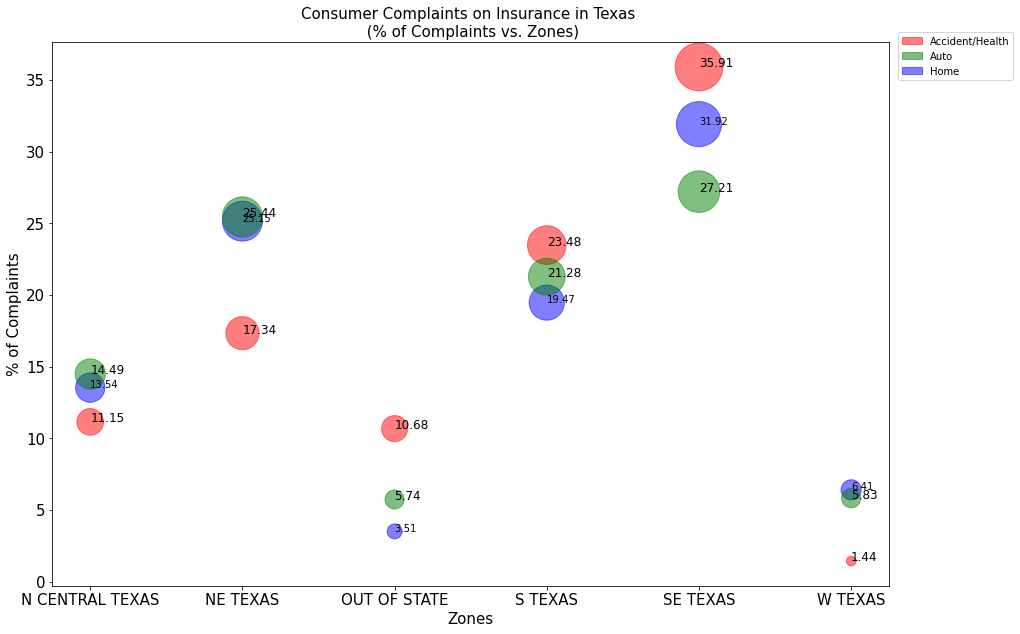

In [35]:
# Create a bubble plot with number of complaints vs.Zones
fig = plt.figure(figsize=(15,10))
area1 = (consdf_accident['Percent']/np.pi)*200
area2 = (consdf_home['Percent']/np.pi)*200
area3 = (consdf_auto['Percent']/np.pi)*200

# Choose random colors
colors1=np.random.rand(15)
colors2=np.random.rand(15)
colors3=np.random.rand(15)

# Scatter plot with labels
plt.scatter(consdf_accident['Correspondent_Location'], consdf_accident['Percent'],s=area1,color='Red', alpha=0.5)
plt.scatter(consdf_home['Correspondent_Location'], consdf_home['Percent'],s=area2,color='blue', alpha=0.5)
plt.scatter(consdf_auto['Correspondent_Location'], consdf_auto['Percent'],s=area3,color='green', alpha=0.5)
plt.title('Consumer Complaints on Insurance in Texas \n (% of Complaints vs. Zones)', fontsize=15 )
plt.xlabel('Zones', fontsize=15)
plt.ylabel('% of Complaints', fontsize=15)

x , y = consdf_accident['Correspondent_Location'], consdf_accident['Percent']
for i, txt in enumerate(consdf_accident['Percent']):
    plt.annotate(txt, (x[i], y[i]), fontsize=12)
    

x1 , y1 = consdf_home['Correspondent_Location'], consdf_home['Percent']
for i, txt in enumerate(consdf_home['Percent']):
    plt.annotate(txt, (x1[i], y1[i]), fontsize=10)
    
x2 , y2 = consdf_auto['Correspondent_Location'], consdf_auto['Percent']
for i, txt in enumerate(consdf_auto['Percent']):
    plt.annotate(txt, (x2[i], y2[i]), fontsize=12)

# Create legend
line_list = ['Accident/Health', 'Auto', 'Home']
color_list = ['red','green','blue']

l =[]

for i in range(0, len(line_list)):
    l.append(mpatches.Patch(color=color_list[i], alpha=0.5,label=line_list[i]))

plt.legend(handles=l, loc=(1.01,0.93))
    
    
# Rotate xticks to show vertical
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('C:/Lenin Data Science/Final Class/Final Class/Bubble1.pdf', dpi=2400)
plt.show()

In [144]:
# Create a dataframe with Complaint number, Received Date, Closed Date, Line of Coverage and Reason for Complaint
consdf_resolve = consdf[["Complaint_Number","Received_Date","Closed_Date","Line_of_Coverage","Correspondent_Location","Subject_Name","Reason_for_Complaint","Disposition_of_Complaint"]]

In [145]:
# Find the Resolution Period
consdf_resolve["Resolution_Period"] = pd.to_datetime(consdf_resolve["Closed_Date"])- pd.to_datetime(consdf_resolve["Received_Date"])

C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
# Remove Duplicates
consdf_resolve.drop_duplicates(inplace=True)

C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
# Drop unwanted columns
consdf_cluster = consdf_resolve.drop(columns=["Received_Date","Closed_Date","Complaint_Number"])

In [152]:
# Right strip days from the Resolution Period
consdf_cluster["Resolution_Period"] = consdf_cluster["Resolution_Period"].dt.days

In [153]:
# Reset Index
consdf_cluster.reset_index(inplace=True)

In [431]:
# View Data
consdf_cluster

,index,Line_of_Coverage,Correspondent_Location,Subject_Name,Reason_for_Complaint,Disposition_of_Complaint,Resolution_Period
0,0,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Cash Value,Corrective Action Taken,430
1,1,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Cash Value,Information Furnished,430
2,2,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Delays (Policyholder Service),Corrective Action Taken,430
3,3,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Delays (Policyholder Service),Information Furnished,430
4,4,Homeowners,S TEXAS,Foremost County Mutual Insurance Company,Customer Service,Additional Monies Received,125
...,...,...,...,...,...,...,...
18633,190,Automobile,S TEXAS,Government Employees Insurance Company,Post-Claim Underwriting,Information Furnished,26
18634,191,Accident and Health,S TEXAS,Cigna Health and Life Insurance Company,Other,Contract Language/Legal Issue,15
18635,192,Accident and Health,S TEXAS,Cigna Health and Life Insurance Company,Other,Corrective Action Taken,15
18636,193,Accident and Health,S TEXAS,Cigna Health and Life Insurance Company,Unsatisfactory Settle/Offer,Contract Language/Legal Issue,15


In [444]:
consdf_dist = consdf_resolve[["Complaint_Number","Resolution_Period"]].drop_duplicates()

In [451]:
consdf_dist["Resolution_Period"] = consdf_dist["Resolution_Period"].dt.days

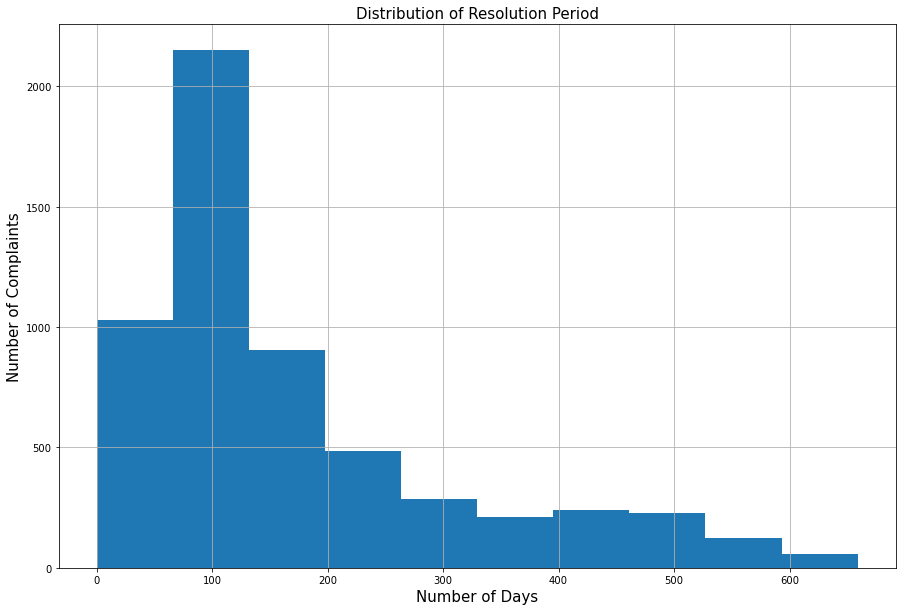

In [452]:
# Histogram to find the Distribution of Resolution Period
fig = plt.figure(figsize=(15,10))
consdf_dist["Resolution_Period"].hist()
plt.title('Distribution of Resolution Period', fontsize=15 )
plt.xlabel('Number of Days', fontsize=15)
plt.ylabel('Number of Complaints', fontsize=15)
plt.savefig('C:/Lenin Data Science/Final Class/Final Class/Dist1.pdf', dpi=2400)
plt.show()


In [156]:
# Histogram to find the Distribution of Resolution Period
consdf_cluster["Resolution_Period"].mean()


189.16729262796437

In [157]:
# Average resolution time for different lines of coverage
consdf_cluster.groupby("Line_of_Coverage")["Resolution_Period"].mean()

Line_of_Coverage
Accident and Health         239.062081
Automobile                  110.163381
Fire, Allied Lines & CMP    140.902256
Homeowners                  109.600186
Liability                   136.932886
Life & Annuity              260.511156
Miscellaneous               185.933518
Name: Resolution_Period, dtype: float64

In [158]:
# Average resolution time for different companies
consdf_cluster.groupby("Subject_Name")["Resolution_Period"].mean()

Subject_Name
                                     172.977778
1ST PATRIOT RISK MANAGEMENT LLC      107.000000
3321 GROUP L.L.C                      70.000000
A Max Auto Insurance                 109.000000
A-MAX AUTO                            78.000000
                                        ...    
York Risk Services Group, Inc.       126.000000
ZAVALA, ERNESTO                      117.000000
Zurich American Insurance Company    143.800000
eHealth Insurance                    170.000000
guerra, marisa                       237.000000
Name: Resolution_Period, Length: 931, dtype: float64

In [304]:
# Average resolution time for different Reasons for complaints
consdf_cluster.groupby("Reason_for_Complaint")["Resolution_Period"].mean()

Reason_for_Complaint
Access to Care                 318.085106
Agency Balance                 317.303030
Agent Handling                 153.428571
Agent/Agency Contrct Termin    317.551724
Assignment of Benefits         101.216216
                                  ...    
Unsatisfactory Settle/Offer    178.149057
Use Of Clue Reports            101.923077
Use of Credit Reports          118.900000
Usual And Customary            142.960565
Wellness Program               627.000000
Name: Resolution_Period, Length: 106, dtype: float64

In [487]:
# Distribution of Disposition status
consdf_cluster.groupby("Disposition_of_Complaint")["Disposition_of_Complaint"].count()

Disposition_of_Complaint
                                    79
Additional Monies Received        3655
Additional Payment Expected        922
Apparent Unlicensed Activity         3
Appraisal Process Invoked           37
Cancel/Non-Renewal Upheld            3
Cancellation Withdrawn              41
Cash Surrender Paid                 17
Claim Not Clean                      8
Claim Settled                     1674
Clean Claims Violation             340
Company Position Upheld            320
Complainant Retained Attorney       87
Complaint Withdrawn                  4
Consumer Withdraw                   39
Contract Language/Legal Issue     2793
Corrective Action Taken           3179
Entered Into Arbitration             3
Entered Into Mediation               2
Failure to Timely Respond          354
Information Furnished             1088
Insufficient Information            19
Mediation Billed Amount            339
Mediation Not Eligible             373
Mediation Paid Amount               55


## K-Modes clustering

In [160]:
# Import libraries
!pip install kmodes
from sklearn import preprocessing
from kmodes.kmodes import KModes

In [162]:
# Use k-modes clustering as there are more categorical variables in the input data
le = preprocessing.LabelEncoder()
consdf_kmode = consdf_cluster[["Line_of_Coverage","Correspondent_Location","Subject_Name","Reason_for_Complaint","Disposition_of_Complaint"]].apply(le.fit_transform)

In [163]:
# Add Resolution period column to dataframe
consdf_kmode.insert(4,"Resolution_Period", consdf_cluster["Resolution_Period"],True)

In [164]:
consdf_kmode

,Line_of_Coverage,Correspondent_Location,Subject_Name,Reason_for_Complaint,Resolution_Period,Disposition_of_Complaint
0,5,4,62,9,430,16
1,5,4,62,9,430,20
2,5,4,62,24,430,16
3,5,4,62,24,430,20
4,3,3,315,20,125,1
...,...,...,...,...,...,...
18633,1,3,371,77,26,20
18634,0,3,221,69,15,15
18635,0,3,221,69,15,16
18636,0,3,221,101,15,15


In [488]:
# kmodes with cao initialization
kmodes_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = kmodes_cao.fit_predict(consdf_kmode)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 107, cost: 76963.0


In [489]:
# View predicted clusters
fitClusters_cao

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

In [490]:
# Cluster centroids
clusterCentroidsDf = pd.DataFrame(kmodes_cao.cluster_centroids_)
clusterCentroidsDf.columns = consdf_kmode.columns

In [491]:
# View cluster centroids
clusterCentroidsDf

,Line_of_Coverage,Correspondent_Location,Subject_Name,Reason_for_Complaint,Resolution_Period,Disposition_of_Complaint
0,0,4,149,101,113,1
1,0,3,871,23,234,16


In [492]:
## Choosing K by comparing Cost against each K¶
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(consdf_kmode)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 84118.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 107, cost: 76963.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 73, cost: 74127.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 72, cost: 72368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 75, cost: 71321.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 75, cost: 70002.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 111, cost: 68930.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, it

## Select the number of clusters

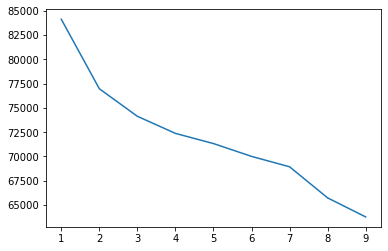

In [493]:
# Plot cost for each cluster
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [494]:
# The number of clusters predicted is 2 based on the elbow method above
# Combine clusters with the original dataframe
consdf_new = pd.DataFrame(fitClusters_cao)
consdf_new.columns = ['predicted_cluster']
consdf_combined = pd.concat([consdf_cluster, consdf_new], axis = 1).reset_index()
consdf_combined= consdf_combined.drop(['index'], axis = 1)

In [495]:
# View combined dataframe
consdf_combined

,level_0,Line_of_Coverage,Correspondent_Location,Subject_Name,Reason_for_Complaint,Disposition_of_Complaint,Resolution_Period,predicted_cluster
0,0,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Cash Value,Corrective Action Taken,430,0
1,1,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Cash Value,Information Furnished,430,0
2,2,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Delays (Policyholder Service),Corrective Action Taken,430,0
3,3,Life & Annuity,SE TEXAS,Accordia Life and Annuity Company,Delays (Policyholder Service),Information Furnished,430,0
4,4,Homeowners,S TEXAS,Foremost County Mutual Insurance Company,Customer Service,Additional Monies Received,125,0
...,...,...,...,...,...,...,...,...
18633,18633,Automobile,S TEXAS,Government Employees Insurance Company,Post-Claim Underwriting,Information Furnished,26,1
18634,18634,Accident and Health,S TEXAS,Cigna Health and Life Insurance Company,Other,Contract Language/Legal Issue,15,1
18635,18635,Accident and Health,S TEXAS,Cigna Health and Life Insurance Company,Other,Corrective Action Taken,15,1
18636,18636,Accident and Health,S TEXAS,Cigna Health and Life Insurance Company,Unsatisfactory Settle/Offer,Contract Language/Legal Issue,15,0


In [496]:
# Identify clusters
consdf_combined_0 = consdf_combined[consdf_combined['predicted_cluster'] == 0]
consdf_combined_1 = consdf_combined[consdf_combined['predicted_cluster'] == 1]

In [497]:
consdf_combined_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 5 to 18637
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   level_0                   5353 non-null   int64 
 1   Line_of_Coverage          5353 non-null   object
 2   Correspondent_Location    5353 non-null   object
 3   Subject_Name              5353 non-null   object
 4   Reason_for_Complaint      5353 non-null   object
 5   Disposition_of_Complaint  5353 non-null   object
 6   Resolution_Period         5353 non-null   int64 
 7   predicted_cluster         5353 non-null   uint16
dtypes: int64(2), object(5), uint16(1)
memory usage: 345.0+ KB


In [498]:
consdf_combined_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13285 entries, 0 to 18636
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   level_0                   13285 non-null  int64 
 1   Line_of_Coverage          13285 non-null  object
 2   Correspondent_Location    13285 non-null  object
 3   Subject_Name              13285 non-null  object
 4   Reason_for_Complaint      13285 non-null  object
 5   Disposition_of_Complaint  13285 non-null  object
 6   Resolution_Period         13285 non-null  int64 
 7   predicted_cluster         13285 non-null  uint16
dtypes: int64(2), object(5), uint16(1)
memory usage: 856.3+ KB


In [499]:
# Install seaborn package
!pip install seaborn

In [500]:
# Import library
import seaborn as sns

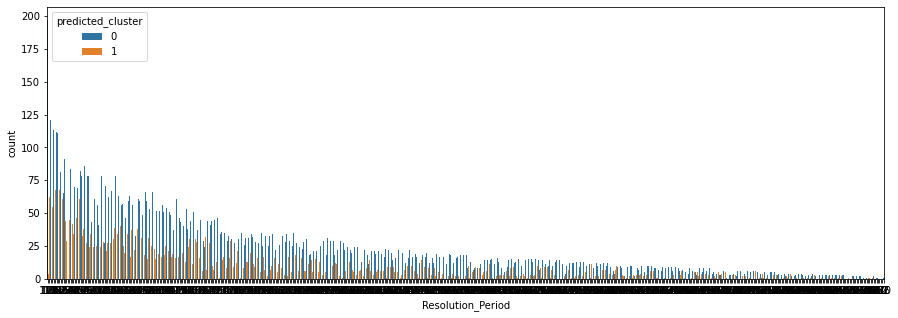

In [501]:
plt.subplots(figsize = (15,5))
sns.countplot(x=consdf_combined['Resolution_Period'],order=consdf_combined['Resolution_Period'].value_counts().index,hue=consdf_combined['predicted_cluster'])
plt.show()

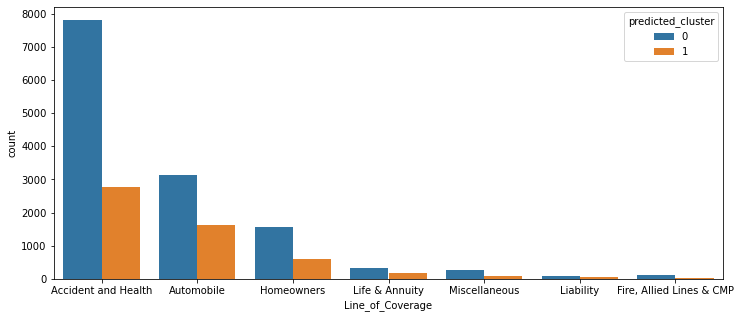

In [502]:
# Clusters for line_of_coverage
plt.subplots(figsize = (12,5))
sns.countplot(x=consdf_combined['Line_of_Coverage'],order=consdf_combined['Line_of_Coverage'].value_counts().index,hue=consdf_combined['predicted_cluster'])
plt.show()

In [503]:
# Get reason for complaint with value count greater than 100
consdf_combined_reason_100 = consdf_combined[consdf_combined['Reason_for_Complaint'].map(consdf_combined['Reason_for_Complaint'].value_counts()) > 100]

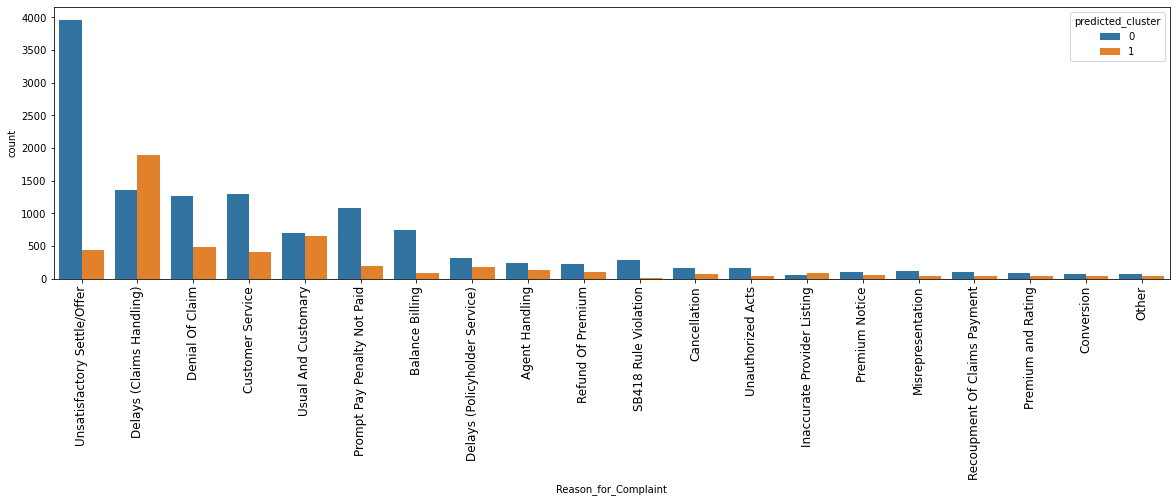

In [504]:
# Clusters for reason for complaints
plt.subplots(figsize = (20,5))
sns.countplot(x=consdf_combined_reason_100['Reason_for_Complaint'],order=consdf_combined_reason_100['Reason_for_Complaint'].value_counts().index,hue=consdf_combined_reason_100['predicted_cluster'])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [505]:
# Get subject names with value count greater than 100
consdf_combined_subject_100 = consdf_combined[consdf_combined['Subject_Name'].map(consdf_combined['Subject_Name'].value_counts()) > 100]

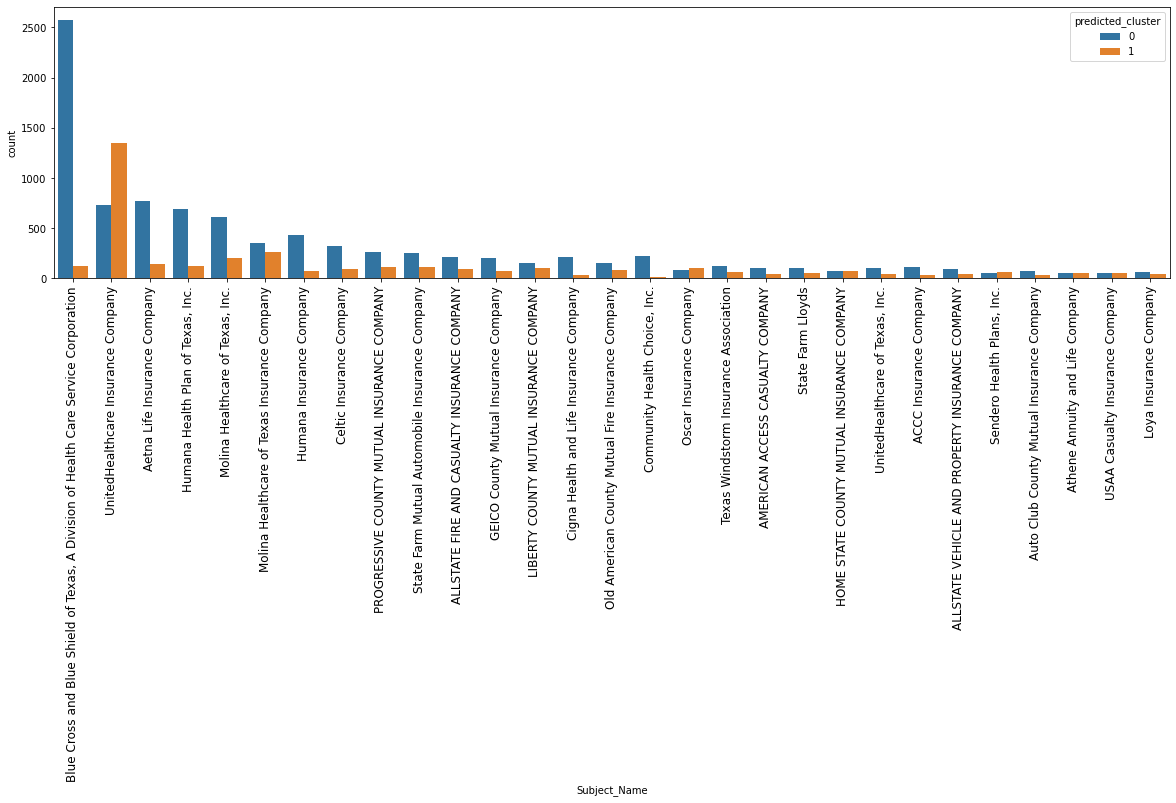

In [506]:
# Clusters for Subject name
plt.subplots(figsize = (20,5))
sns.countplot(x=consdf_combined_subject_100['Subject_Name'],order=consdf_combined_subject_100['Subject_Name'].value_counts().index,hue=consdf_combined_subject_100['predicted_cluster'])
plt.xticks(rotation=90, fontsize=12)
plt.show()

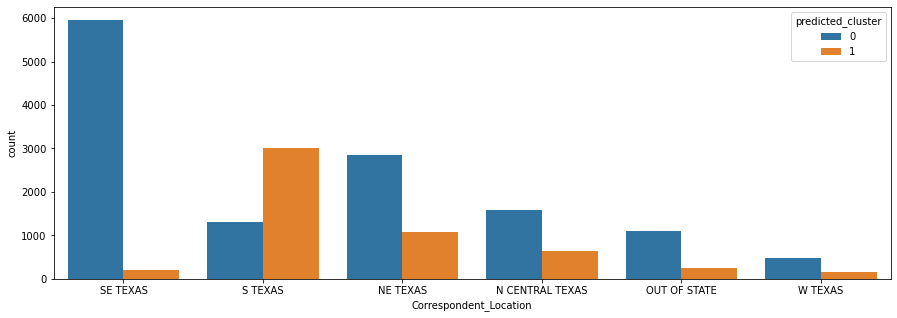

In [507]:
# Clusters for line_of_coverage
plt.subplots(figsize = (15,5))
sns.countplot(x=consdf_combined['Correspondent_Location'],order=consdf_combined['Correspondent_Location'].value_counts().index,hue=consdf_combined['predicted_cluster'])
plt.show()

In [540]:
# Combine clusters with the scaled dataframe
consdf_parallel = pd.concat([consdf_kmode, consdf_new], axis = 1).reset_index()
consdf_parallel= consdf_parallel.drop(['index'], axis = 1)

In [541]:
consdf_parallel

,Line_of_Coverage,Correspondent_Location,Subject_Name,Reason_for_Complaint,Resolution_Period,Disposition_of_Complaint,predicted_cluster
0,5,4,62,9,430,16,0
1,5,4,62,9,430,20,0
2,5,4,62,24,430,16,0
3,5,4,62,24,430,20,0
4,3,3,315,20,125,1,0
...,...,...,...,...,...,...,...
18633,1,3,371,77,26,20,1
18634,0,3,221,69,15,15,1
18635,0,3,221,69,15,16,1
18636,0,3,221,101,15,15,0


## Parallel Coordinates Plot

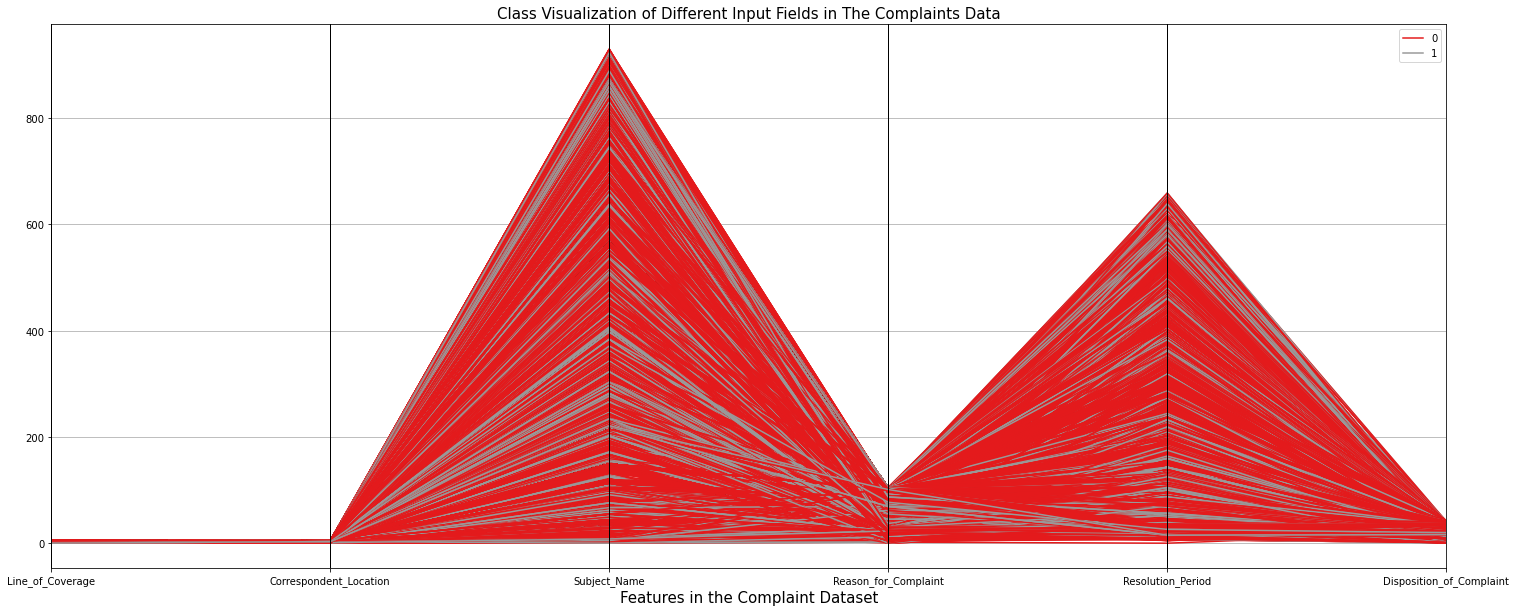

In [601]:
# Display parallel coordinates plots, one for each cluster
from pandas.plotting import parallel_coordinates
fig = plt.figure(figsize=(25,10))
consdf_clustered = pd.DataFrame(consdf_parallel, index=consdf_parallel.index, columns=consdf_parallel.columns)
parallel_coordinates(consdf_clustered,class_column='predicted_cluster',colormap=plt.get_cmap("Set1"))
plt.title("Class Visualization of Different Input Fields in The Complaints Data",fontsize=15)
plt.xlabel("Features in the Complaint Dataset",fontsize=15)
plt.savefig('C:/Lenin Data Science/Final Class/Final Class/graph1.pdf')
plt.show()

## Linear Regression

In [512]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [592]:
# Keep all independent features into X
X = consdf_parallel[["Reason_for_Complaint","Line_of_Coverage","Subject_Name","Correspondent_Location"]]
#X = consdf_parallel[["Subject_Name"]]
#X = consdf_parallel[["Correspondent_Location"]]
Y = consdf_parallel["Resolution_Period"]

In [593]:
#Convert categorical variable into dummy/indicator variables and drop one in each category
X = pd.get_dummies(data=X, drop_first=True)

In [594]:
# Import libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

# Run regression
regrs = linear_model.LinearRegression() 
regrs.fit(X_train, Y_train)
predicted = regrs.predict(X_test)
print(predicted)

[204.04186701 157.11192654 170.31207902 ... 198.75318658 141.37525109
 218.65277186]


In [595]:
# View test data
Y_test

15402    200
15855    166
9774      39
3613     592
3528     546
        ... 
16292    175
650      123
491      310
10076     78
5209      92
Name: Resolution_Period, Length: 3728, dtype: int64

In [596]:
# Mean absolute error
from sklearn import metrics
metrics.mean_absolute_error(Y_test, predicted)

114.10811819426289

In [597]:
# Mean squared error
metrics.mean_squared_error(Y_test, predicted)

21062.96987825932

In [598]:
# Variance Score
metrics.explained_variance_score(Y_test, predicted)

0.057331241588450266

In [600]:
# R2 square
metrics.r2_score(Y_test, predicted)

0.05711674601534278

In [602]:
# Low value of R-2 indicates that none of the input factors have any influence on the resolution dates

'C:\\Users\\Supernova'